In [1]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import powerlaw


%matplotlib inline

In [2]:
import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#import matplotlib.gridspec as gridspec
from matplotlib import rc
rc('text', usetex=False)
rc('font', family='serif')

In [3]:
#plot function from pylab/degree distribution 
def plot_basics(data, data_inst, fig, units):
    from powerlaw import plot_pdf, Fit, pdf
    annotate_coord = (-.4, .95)
    ax1 = fig.add_subplot(n_graphs,n_data,data_inst)
    plot_pdf(data[data>0], ax=ax1, linear_bins=True, color='r', linewidth=.5)
    x, y = pdf(data, linear_bins=True)
    ind = y>0
    y = y[ind]
    x = x[:-1]
    x = x[ind]
    ax1.scatter(x, y, color='r', s=.5)
    plot_pdf(data[data>0], ax=ax1, color='b', linewidth=2)
    from pylab import setp
    setp( ax1.get_xticklabels(), visible=False)
    #ax1.set_xticks(ax1.get_xticks()[::2])
    ax1.set_yticks(ax1.get_yticks()[::2])
    locs,labels = yticks()
    #yticks(locs, map(lambda x: "%.0f" % x, log10(locs)))
    if data_inst==1:
        ax1.annotate("A", annotate_coord, xycoords="axes fraction", fontsize=14)

    
    from mpl_toolkits.axes_grid.inset_locator import inset_axes
    ax1in = inset_axes(ax1, width = "30%", height = "30%", loc=3)
    ax1in.hist(data, normed=True, color='b')
    ax1in.set_xticks([])
    ax1in.set_yticks([])

    
    ax2 = fig.add_subplot(n_graphs,n_data,n_data+data_inst, sharex=ax1)
    plot_pdf(data, ax=ax2, color='b', linewidth=2)
    fit = Fit(data, xmin=1, discrete=True)
    fit.power_law.plot_pdf(ax=ax2, linestyle=':', color='g')
    p = fit.power_law.pdf()
    #ax2.set_ylim(min(p), max(p))
    ax2.set_xlim(ax1.get_xlim())
    
    fit = Fit(data, discrete=True)
    fit.power_law.plot_pdf(ax=ax2, linestyle='--', color='g')
    from pylab import setp
    setp( ax2.get_xticklabels(), visible=False)
    #ax2.set_xticks(ax2.get_xticks()[::2])
    if ax2.get_ylim()[1] >1:
        ax2.set_ylim(ax2.get_ylim()[0], 1)
    
    ax2.set_yticks(ax2.get_yticks()[::2])
    #locs,labels = yticks()
    #yticks(locs, map(lambda x: "%.0f" % x, log10(locs)))
    if data_inst==1:
       ax2.annotate("B", annotate_coord, xycoords="axes fraction", fontsize=14)        
       ax2.set_ylabel(r"$p(X)$")# (10^n)")
        
    ax3 = fig.add_subplot(n_graphs,n_data,n_data*2+data_inst)#, sharex=ax1)#, sharey=ax2)
    fit.power_law.plot_pdf(ax=ax3, linestyle='--', color='g')
    fit.exponential.plot_pdf(ax=ax3, linestyle='--', color='r')
    fit.plot_pdf(ax=ax3, color='b', linewidth=2)
    
    #p = fit.power_law.pdf()
    ax3.set_ylim(ax2.get_ylim())
    ax3.set_yticks(ax3.get_yticks()[::2])
    ax3.set_xlim(ax1.get_xlim())
    
    #locs,labels = yticks()
    #yticks(locs, map(lambda x: "%.0f" % x, log10(locs)))
    if data_inst==1:
        ax3.annotate("C", annotate_coord, xycoords="axes fraction", fontsize=14)

    #if ax2.get_xlim()!=ax3.get_xlim():
    #    zoom_effect01(ax2, ax3, ax3.get_xlim()[0], ax3.get_xlim()[1])
    ax3.set_xlabel(units)

In [4]:
#path to pickle files
path = "/home/rick/UH-Spring-2019/Network Analysis/"

In [5]:
#getting the data
twomonths = path + "Users_comments.pkl"
tendays = path + 'Users_comments_nanremoved_noselfloops_10days.pkl'
threedays = path + 'Users_comments_nanremoved_noselfloops_3days.pkl'
rusmonth = path + 'Users_comments_nanremoved_noselfloops_russian_1kk_October.pkl'
G1 = nx.read_gpickle(twomonths)
G2 = nx.read_gpickle(rusmonth)


In [6]:
#Get the largest connected component 
subgraphsEng = list(nx.connected_component_subgraphs(G1))
prunedgraphEng = subgraphsEng[0]
degree_sequenceEng = sorted(dict(nx.degree(prunedgraphEng)).values(), reverse = True)
dataEng = degree_sequenceEng

subgraphsRus =  list(nx.connected_component_subgraphs(G2))
prunedgraphRus = subgraphsRus[0]
degree_sequenceRus = sorted(dict(nx.degree(prunedgraphRus)).values(), reverse = True)
dataRus = degree_sequenceRus

Text(0.5,0,'Degree k')

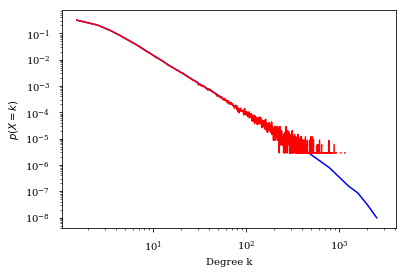

In [8]:
figPDF = powerlaw.plot_pdf(dataEng, color='b')
powerlaw.plot_pdf(dataEng, linear_bins=True, color='r', ax=figPDF)
####
figPDF.set_ylabel(r"$p(X=k)$")
figPDF.set_xlabel(r"Degree k")

Calculating best minimal value for power law fit
/home/rick/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/rick/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Text(0.5,16.2,'Degree k')

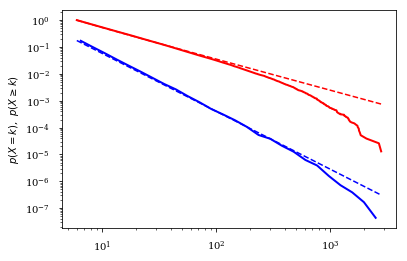

In [10]:
fit = powerlaw.Fit(dataEng, discrete=True)
####
figCCDF = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF)
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)
####
figCCDF.set_ylabel(r"$p(X=k)$,  $p(X\geq k)$")
figPDF.set_xlabel(r"Degree k")

Calculating best minimal value for power law fit
/home/rick/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/rick/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


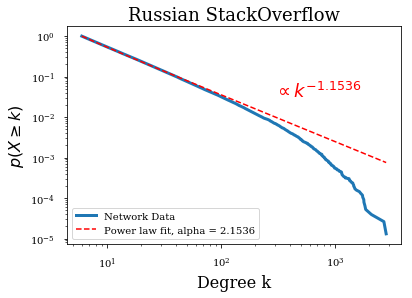

In [8]:
fit = powerlaw.Fit(dataEng, discrete=True)
####
alpha = fit.power_law.alpha
alphastr = 'alpha = ' + str(round(alpha,4))
propto = (-1*(alpha-1))
proptostr = str(round(propto,4))
fit.distribution_compare('power_law', 'lognormal')
fig = fit.plot_ccdf(linewidth=3, label='Network Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit, ' + alphastr)
#fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
####
fig.set_ylabel(r"$p(X\geq k)$", fontsize = 16)
fig.set_xlabel(r"Degree k", fontsize = 16)
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)
testie = '$\propto k^{'+ proptostr +'}$'
plt.text(0.75, 0.7,testie, ha='center', va='center', transform=fig.transAxes, color='r',fontsize=18)
plt.title('Russian StackOverflow', fontsize = 18)
plt.savefig('RusDegree.png',bbox_inches='tight')

Calculating best minimal value for power law fit
/home/rick/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/rick/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit


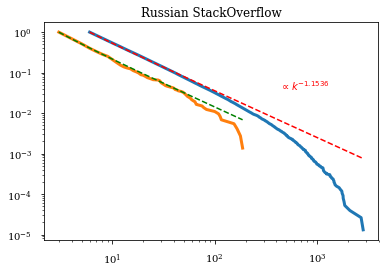

In [11]:
#ploting both Datasets in one plot (Not very useful)


fitEng = powerlaw.Fit(dataEng, discrete=True)
fitRus = powerlaw.Fit(dataRus, discrete=True)

####
alphaEng = fitEng.power_law.alpha
alphaEngstr = 'alpha = ' + str(round(alpha,4))
proptoEng = (-1*(alpha-1))
proptoEngstr = str(round(propto,4))
fitEng.distribution_compare('power_law', 'lognormal')
figEng = fitEng.plot_ccdf(linewidth=3, label='Network Data')
fitEng.power_law.plot_ccdf(ax=figEng, color='r', linestyle='--', label='Power law fit, ' + alphastr)
#fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')


alphaRus = fitRus.power_law.alpha
alphaRusstr = 'alpha = ' + str(round(alpha,4))
proptoRus = (-1*(alpha-1))
proptoRusstr = str(round(propto,4))
fitRus.distribution_compare('power_law', 'lognormal')
figRus = fitRus.plot_ccdf(linewidth=3, label='Network Data')
fitRus.power_law.plot_ccdf(ax=figEng, color='Green', linestyle='--', label='Power law fit, ' + alphastr)
#fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
####

fig.set_ylabel(r"$p(X\geq k)$")
fig.set_xlabel(r"Degree k")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)
testie = '$\propto k^{'+ proptostr +'}$'
plt.text(0.75, 0.7,testie, ha='center', va='center', transform=fig.transAxes, color='r')
plt.title('Russian StackOverflow')

plt.show()